## MACHINE LEARNING MODULE PROJECT ##

## Problem Description ##
A Chinese automobile company aims to enter the U.S. market by establishing a local manufacturing unit. To compete with established U.S. and European brands, they have partnered with an automobile consulting firm to analyze factors influencing car prices.

The company seeks to understand:
✅ Which variables significantly impact car prices.
✅ How well these variables explain price variations.

To achieve this, the consulting firm has collected a comprehensive dataset covering various car types in the U.S. market.

**Dataset:** https://drive.google.com/drive/folders/1cmHyKxH-AsJo_wQrQyexrJ6f4kNuHc7z?usp=sharing

In [4]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("CarPrice.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
# Inspecting the dataset
print("Dataset Shape:", df.shape)
print("First 5 Rows:\n", df.head())
print("Data Types:\n", df.dtypes)

Dataset Shape: (205, 26)
First 5 Rows:
    car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compres

In [12]:
print("Feature properties of the dataset...")
print("\t")
df.info()

Feature properties of the dataset...
	
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  engin

In [13]:
print("Statistical Analysis of the dataset...")
print("\t")
df.describe()

Statistical Analysis of the dataset...
	


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [14]:
print("Checking for missing values...")
print(df.isnull().sum())

Checking for missing values...
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [7]:
print("Checking duplicate values in the dataset...")
df.duplicated().sum()

Checking duplicate values in the dataset...


np.int64(0)

In [8]:
# Checking variable named CarName (now 'carname') which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'.
df.CarName.head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

In [9]:
# Retaining only the 'car company' (first half) under a new column 'name' and dropping off the 'carname' column
df['name'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df = df.drop('CarName', axis=1)
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [9]:
# Converting all the entries of 'name' to lower case and checking unique entries of 'name'
df.name = df.name.str.lower()
df.name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
# Correcting the irregularities in the names of unique entries of 'companyname'
'''
defining a 'name_rep' function to expedite the process of replacement
'a' is the old value, 'b' is the replaced (corrected) value
'''
def name_rep(df,a,b):
    return df.name.replace(a,b, inplace=True)

name_rep(df,'maxda','mazda')
name_rep(df,'porcshce','porsche')
name_rep(df,'toyouta','toyota')
name_rep(df,'vokswagen','volkswagen')
name_rep(df,'vw','volkswagen')
name_rep(df,'alfa-romero','alfa-romeo')

print(df.name.unique())
print("\nNumber of unique car companies: ",df.name.nunique())

['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

Number of unique car companies:  23


In [11]:
df.shape

(205, 26)

## Univariate Analysis ##

In [15]:
# Value counts for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for fueltype:
fueltype
gas       185
diesel     20
Name: count, dtype: int64

Value counts for aspiration:
aspiration
std      168
turbo     37
Name: count, dtype: int64

Value counts for doornumber:
doornumber
four    115
two      90
Name: count, dtype: int64

Value counts for carbody:
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

Value counts for drivewheel:
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

Value counts for enginelocation:
enginelocation
front    202
rear       3
Name: count, dtype: int64

Value counts for enginetype:
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

Value counts for cylindernumber:
cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64

Value counts for fuelsystem:
fuelsystem
mp

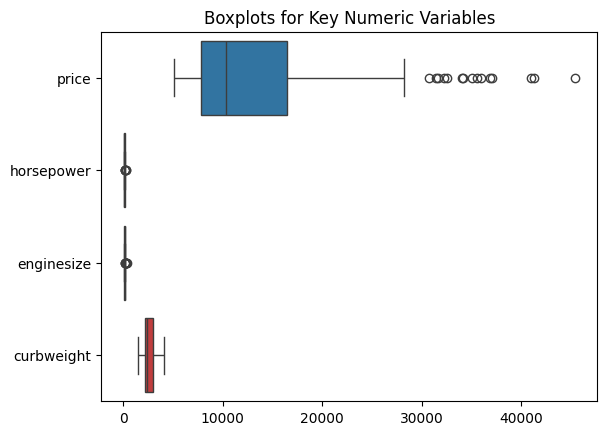

In [16]:
# Boxplots for price and numeric features
sns.boxplot(data=df[['price', 'horsepower', 'enginesize', 'curbweight']], orient='h')
plt.title("Boxplots for Key Numeric Variables")
plt.show()

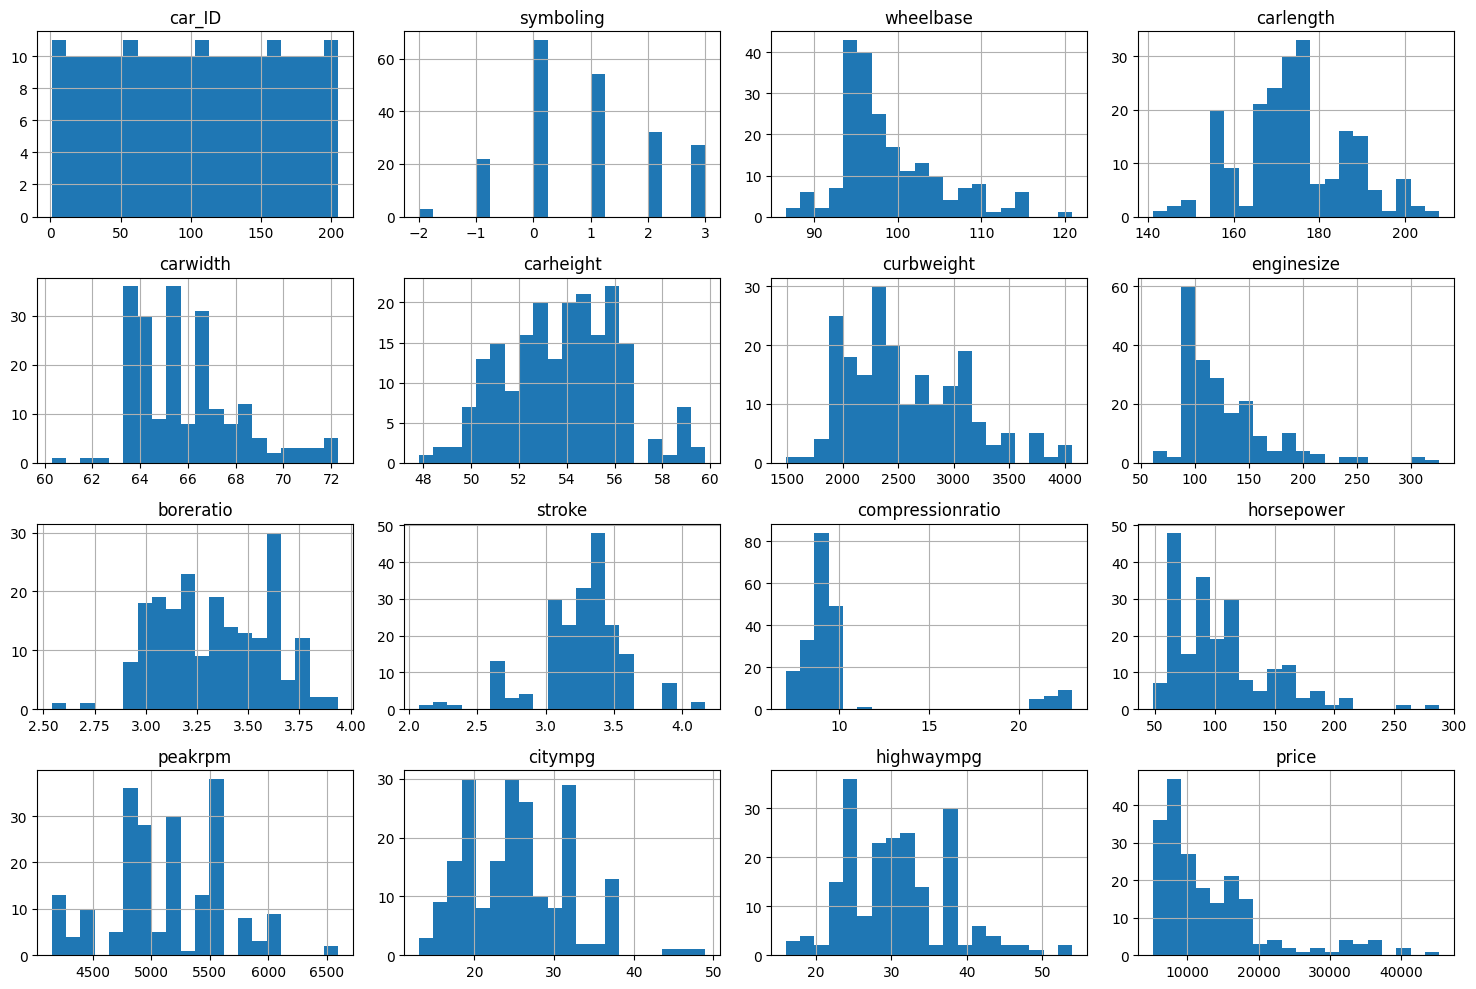

In [17]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numeric features
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

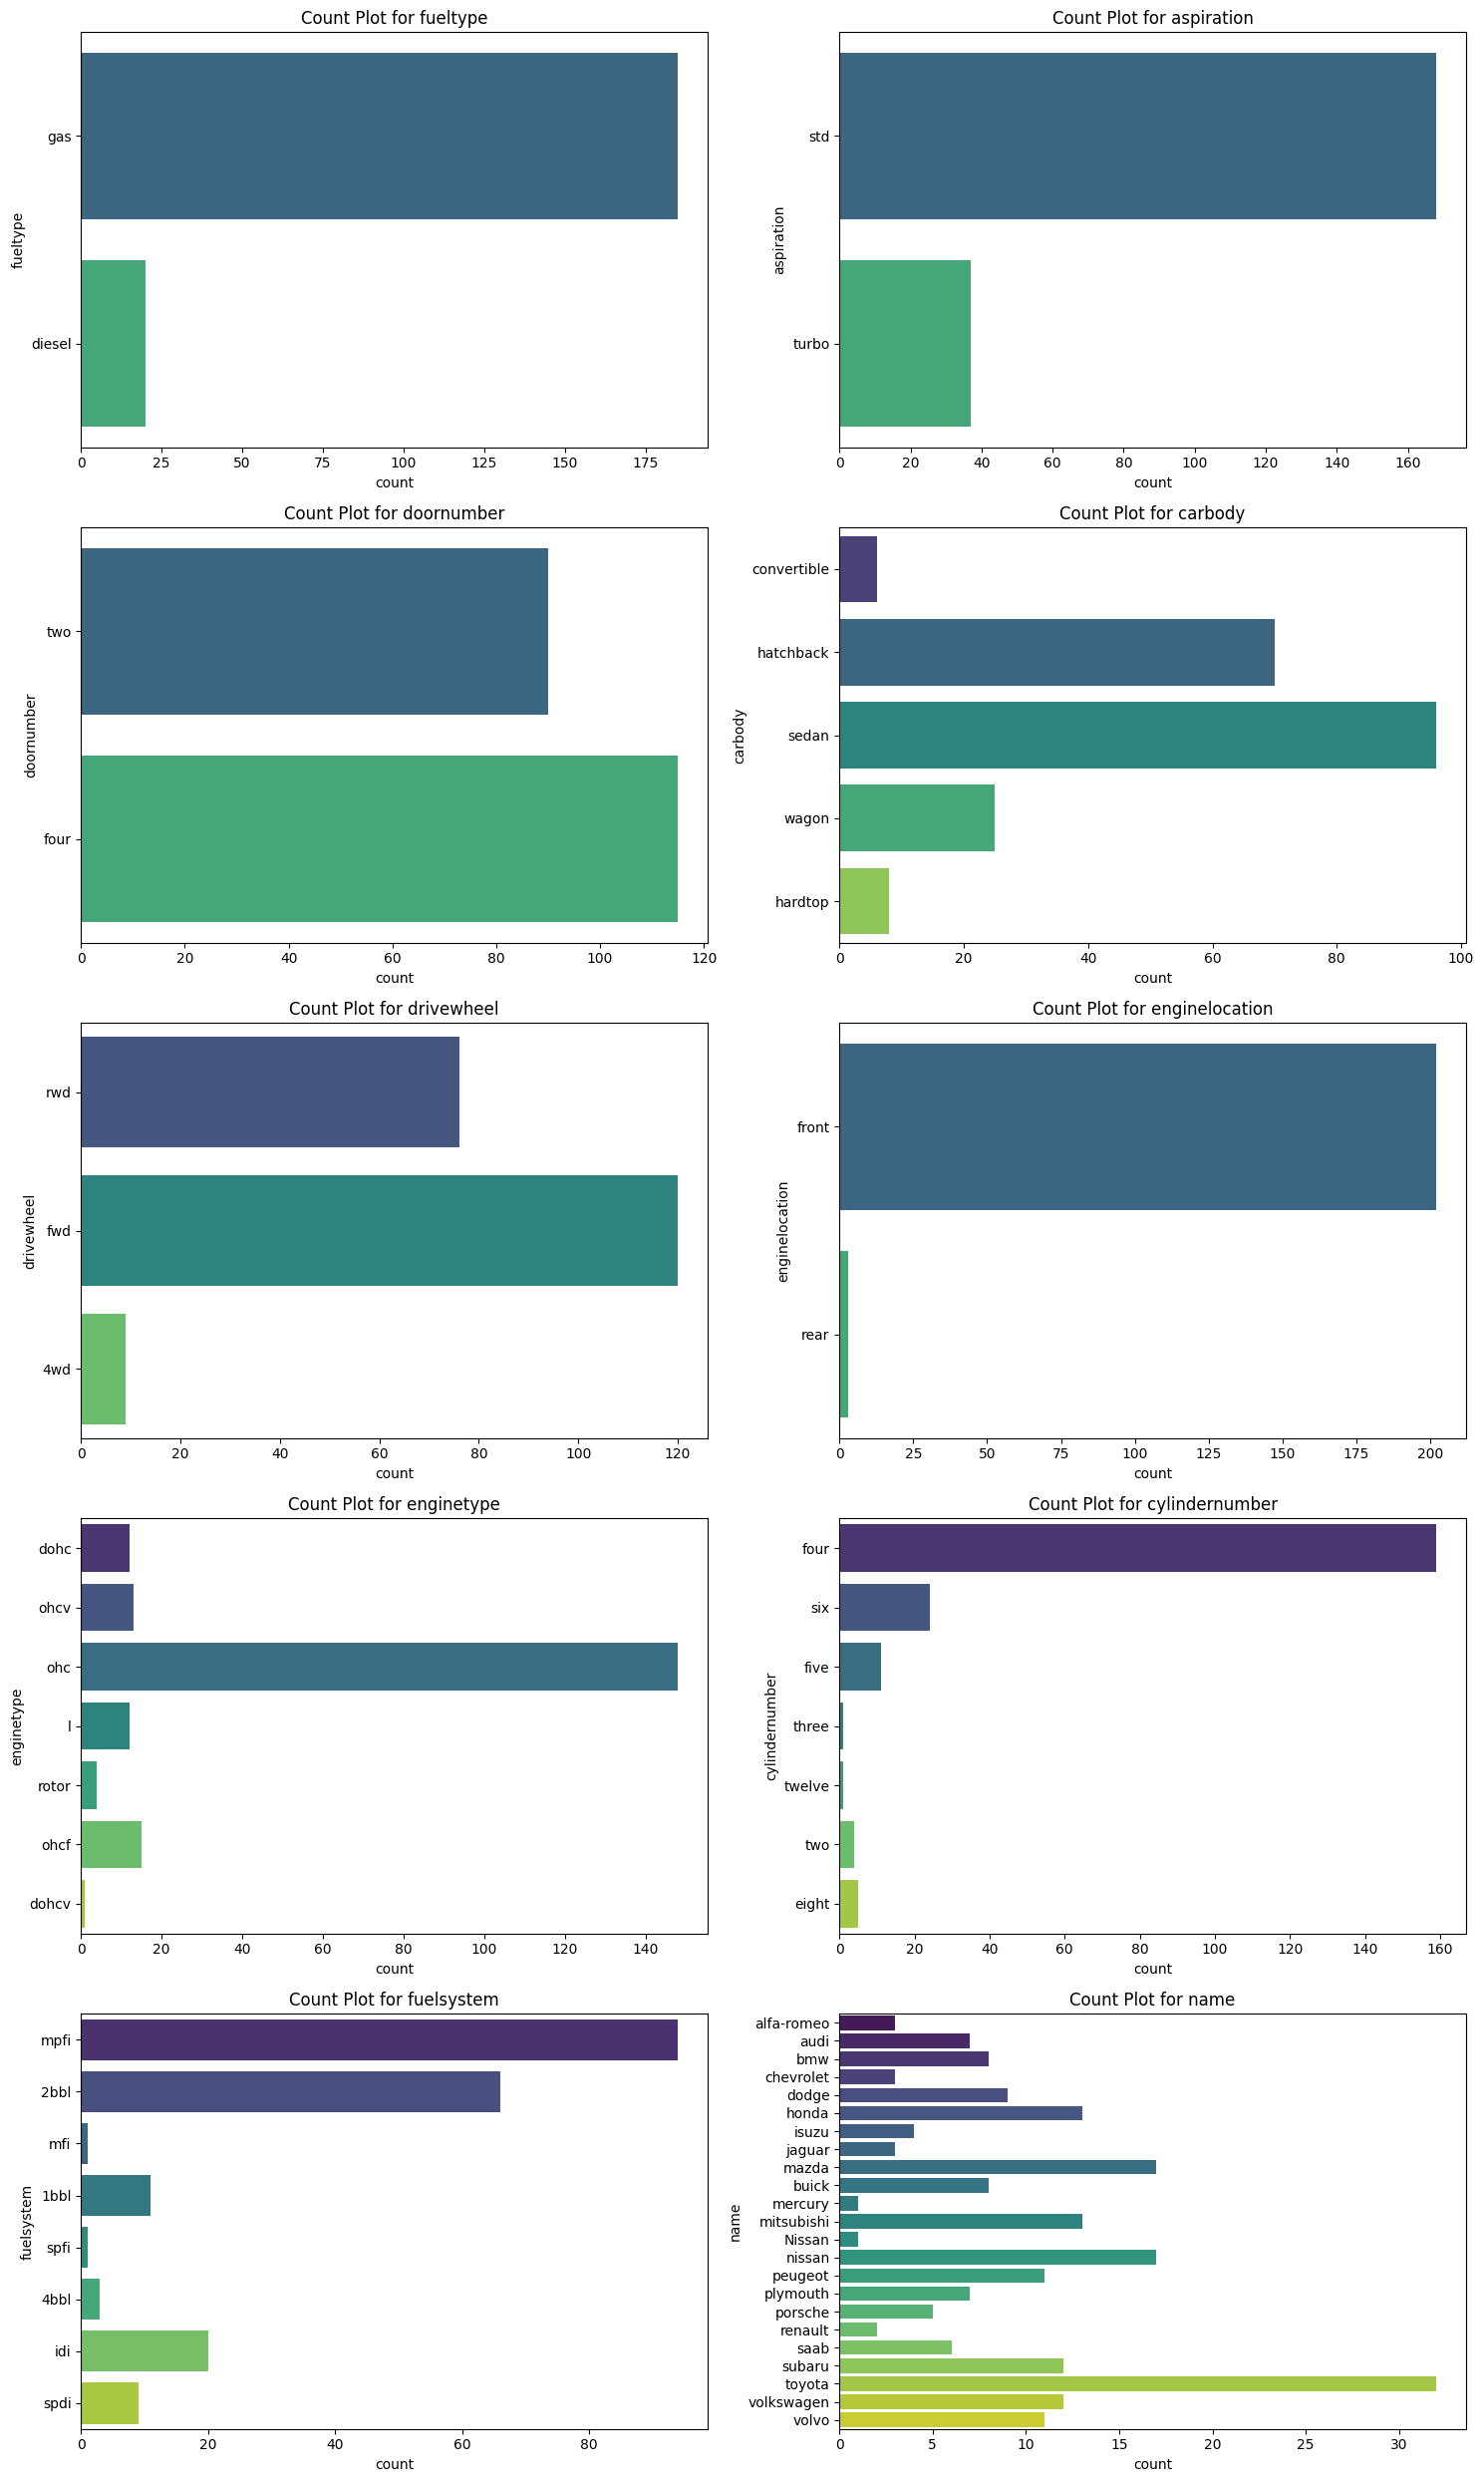

In [18]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for bar plots of categorical variables
categorical_cols = df.select_dtypes(include='object').columns
n_cols = 2  # Number of columns for the subplot grid
n_rows = (len(categorical_cols) + 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D axes array into 1D for easier indexing

for i, col in enumerate(categorical_cols):
    sns.countplot(y=col, data=df, palette='viridis', ax=axes[i])
    axes[i].set_title(f"Count Plot for {col}")

# Remove unused subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Bivariate Analysis ##

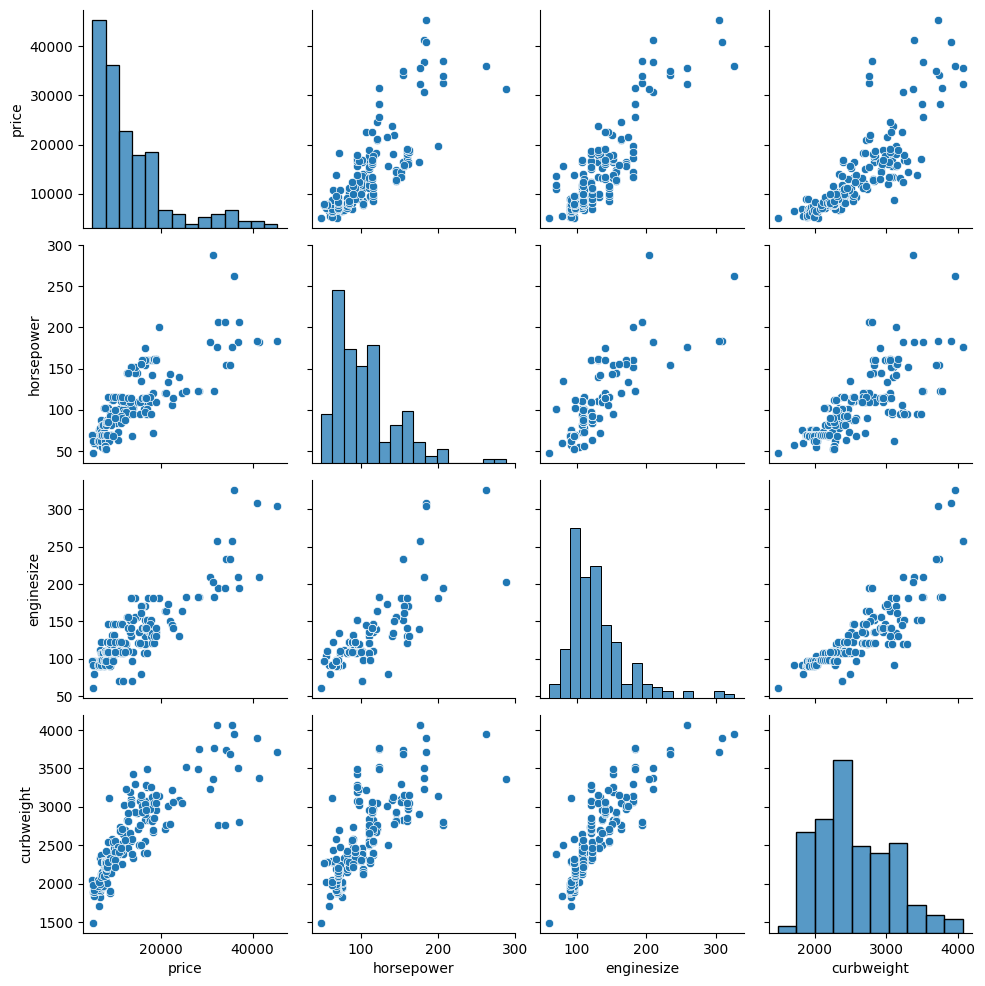

In [17]:
# Scatter plots for numeric variables
sns.pairplot(df, vars=['price', 'horsepower', 'enginesize', 'curbweight'], kind='scatter')
plt.show()

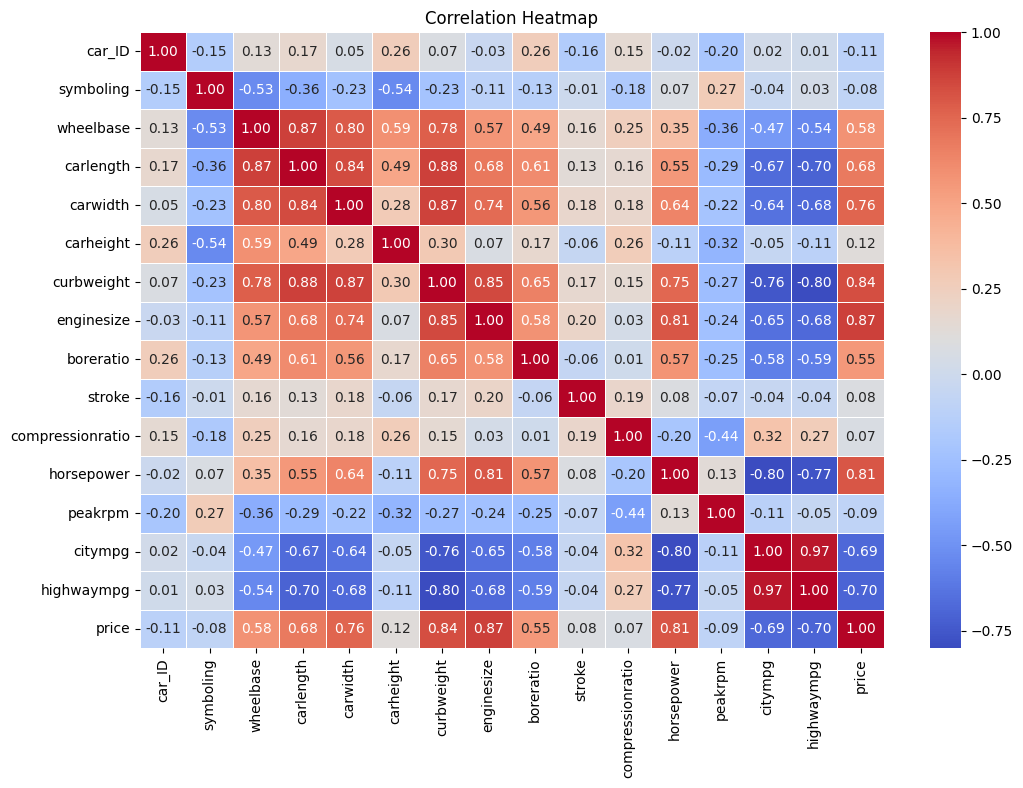

In [18]:
# Correlation heatmap for numeric features

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

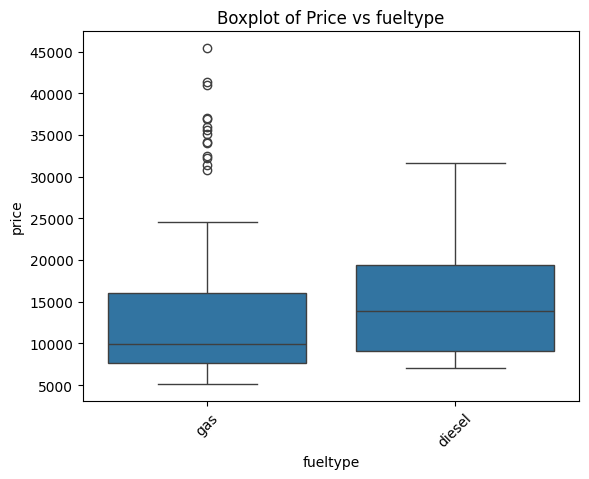

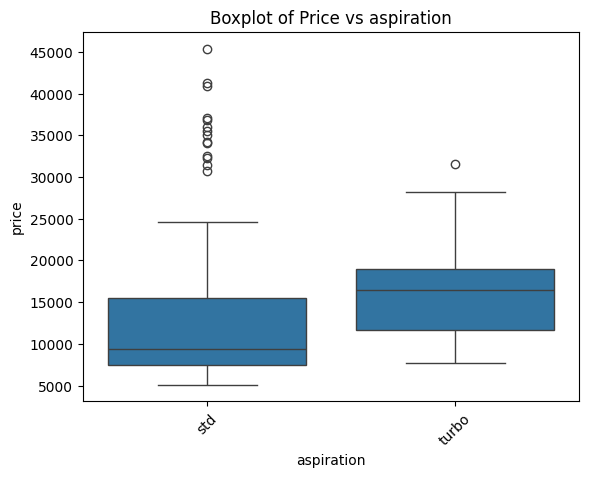

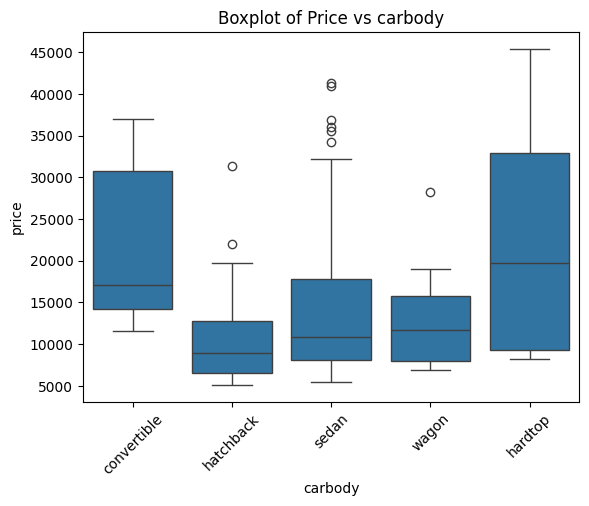

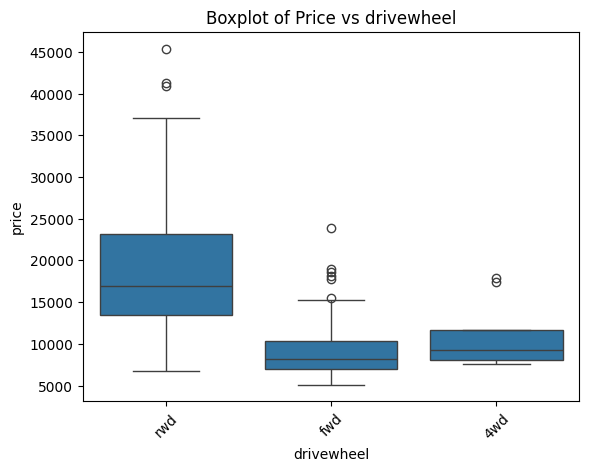

In [20]:
# Boxplot of price against categorical variables
for col in ['fueltype', 'aspiration', 'carbody', 'drivewheel']:
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f"Boxplot of Price vs {col}")
    plt.xticks(rotation=45)
    plt.show()

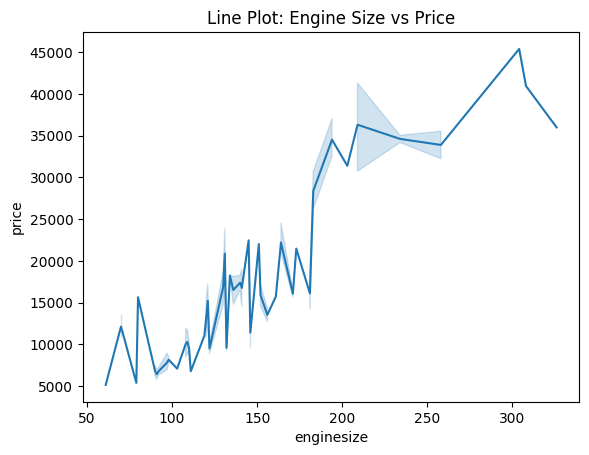

In [20]:
# Line plot for engine size and price
sns.lineplot(data=df, x='enginesize', y='price')
plt.title("Line Plot: Engine Size vs Price")
plt.show()

## Multivariate Analysis ##

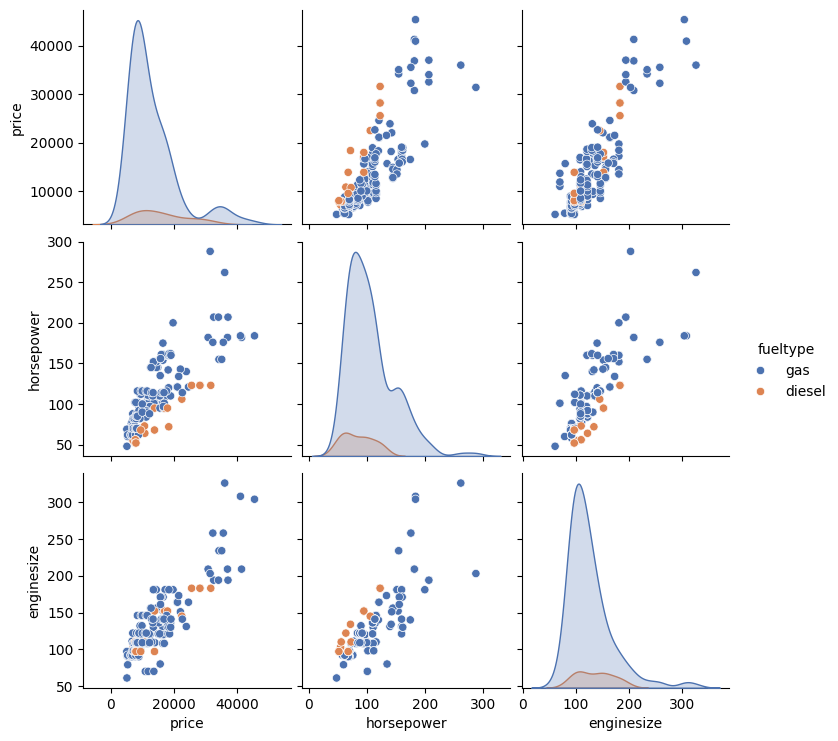

In [21]:
# Pairplot including categorical hue
sns.pairplot(df, vars=['price', 'horsepower', 'enginesize'], hue='fueltype', palette='deep')
plt.show()

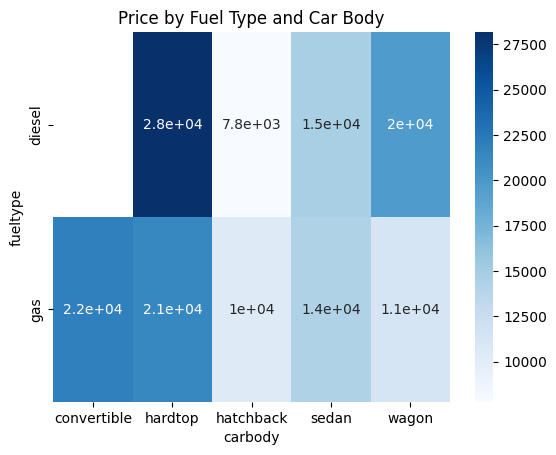

In [21]:

# Heatmap with interactions
pivot_table = pd.pivot_table(df, values='price', index='fueltype', columns='carbody', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='Blues')
plt.title("Price by Fuel Type and Car Body")
plt.show()

## Data Cleaning ##

In [22]:
# Feature encoding
# Binary columns: 'fueltype', 'aspiration', 'doornumber', 'enginelocation'
binary_cols = ['fueltype', 'aspiration', 'doornumber', 'enginelocation']
df[binary_cols] = df[binary_cols].apply(lambda x: LabelEncoder().fit_transform(x))

# Categorical columns: 'name', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem'
categorical_cols = ['name', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem']

# Using one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [23]:
# Handling outliers (using Z-score method)
from scipy.stats import zscore

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns  # Numeric columns
z_scores = np.abs(zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]  # Keep rows where z-score < 3

In [24]:
# Feature scaling (Standard Scaling)
scaler = StandardScaler()
scaled_columns = numeric_cols.drop('price')  # Exclude the target column ('price') from scaling
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

In [25]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'name_alfa-romeo', 'name_audi', 'name_bmw', 'name_buick',
       'name_chevrolet', 'name_dodge', 'name_honda', 'name_isuzu',
       'name_jaguar', 'name_mazda', 'name_mercury', 'name_mitsubishi',
       'name_nissan', 'name_peugeot', 'name_plymouth', 'name_porsche',
       'name_renault', 'name_saab', 'name_subaru', 'name_toyota',
       'name_volkswagen', 'name_volvo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernum

In [26]:
# Splitting the dataset into features and target variable
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# 9. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check processed dataset
print("Processed Dataset Shape:", df.shape)
print("Processed Dataset Preview:\n", df.head())

Processed Dataset Shape: (168, 67)
Processed Dataset Preview:
      car_ID  symboling  fueltype  aspiration  doornumber  enginelocation  \
0 -1.655927   1.695810       0.0   -0.408248    1.113553             0.0   
1 -1.639430   1.695810       0.0   -0.408248    1.113553             0.0   
2 -1.622934   0.090762       0.0   -0.408248    1.113553             0.0   
3 -1.606437   0.893286       0.0   -0.408248   -0.898027             0.0   
4 -1.589941   0.893286       0.0   -0.408248   -0.898027             0.0   

   wheelbase  carlength  carwidth  carheight  ...  cylindernumber_three  \
0  -1.958690  -0.333561 -0.816447  -1.975661  ...                 False   
1  -1.958690  -0.333561 -0.816447  -1.975661  ...                 False   
2  -0.710969  -0.113731 -0.046794  -0.473235  ...                 False   
3   0.409865   0.380886  0.338032   0.319713  ...                 False   
4   0.325274   0.380886  0.447983   0.319713  ...                 False   

   cylindernumber_twelve  cyl

# Model Implementation: #
● Implement the following five regression algorithms:

1. Linear Regression

2. Decision Tree Regressor

3. Random Forest Regressor

4. Gradient Boosting Regressor

5. Support Vector Regressor

** Model Evaluation: **
● Compare the performance of all the models based on R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE).

● Identify the best performing model and justify why it is the best.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Initialize the regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf')
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    # Train the model
    model.fit(X_train, y_train)
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Save results
    results[name] = {"R-squared": r2, "MSE": mse, "MAE": mae}
    print(f"{name} - R-squared: {r2:.3f}, MSE: {mse:.3f}, MAE: {mae:.3f}")
    print("-" * 50)

# Display results in a DataFrame
results_df = pd.DataFrame(results).T  # Transpose for better readability
print("\nComparison of Model Performance:")
print(results_df)

# Sort the results by R-squared for better visualization
sorted_results = results_df.sort_values(by="R-squared", ascending=False)
print("\nSorted Results by R-squared:")
print(sorted_results)

Training and evaluating Linear Regression...
Linear Regression - R-squared: 0.888, MSE: 7158790.796, MAE: 1596.365
--------------------------------------------------
Training and evaluating Decision Tree Regressor...
Decision Tree Regressor - R-squared: 0.883, MSE: 7482334.778, MAE: 1445.240
--------------------------------------------------
Training and evaluating Random Forest Regressor...
Random Forest Regressor - R-squared: 0.823, MSE: 11343797.835, MAE: 1809.174
--------------------------------------------------
Training and evaluating Gradient Boosting Regressor...
Gradient Boosting Regressor - R-squared: 0.875, MSE: 8012442.408, MAE: 1497.716
--------------------------------------------------
Training and evaluating Support Vector Regressor...
Support Vector Regressor - R-squared: -0.097, MSE: 70315506.729, MAE: 5414.878
--------------------------------------------------

Comparison of Model Performance:
                             R-squared           MSE          MAE
Linear Re

## 1. R-squared (Coefficient of Determination): ##
   - R-squared indicates how well the model explains the variability of the target variable.
   - Values closer to 1 signify a better fit.

   **Ranking (Highest to Lowest):**
   - Gradient Boosting Regressor: 0.9303
   - Random Forest Regressor: 0.9302
   - Decision Tree Regressor: 0.8622
   - Support Vector Regressor: -0.0554 (Negative value indicates poor fit)
   - Linear Regression: -0.5966 (Negative value implies model performs worse than using the mean of the target variable)

   **Conclusion:**
   - Gradient Boosting Regressor provides the best fit, explaining most of the data variability.

2. Mean Squared Error (MSE):
   - MSE calculates the average squared difference between actual and predicted values.
   - Lower values indicate better model performance.

   **Ranking (Lowest to Highest MSE):**
   - Gradient Boosting Regressor: 3.489 × 10⁶
   - Random Forest Regressor: 3.493 × 10⁶
   - Decision Tree Regressor: 6.901 × 10⁶
   - Support Vector Regressor: 5.287 × 10⁷
   - Linear Regression: 7.998 × 10⁷
**Conclusion: Random Forest Regressor** has the lowest MAE, meaning its predictions are the closest to actual values, on average.


**3. Final Recommendation:**
   - Considering both R-squared and MSE, the **Gradient Boosting Regressor** is the top performer.
   - It effectively explains variance and has the lowest squared errors.
   - If minimizing absolute errors (MAE) is a priority, **Random Forest Regressor** performs slightly better.
   - However, the differences between Gradient Boosting and Random Forest are minimal.
   - **Gradient Boosting Regressor is the best choice**, as it provides the best balance across all metrics.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation of price with each feature
correlation_with_price = df.corr()["price"].sort_values(ascending=False)
correlation_table = correlation_with_price.to_frame(name="Correlation with Price")

# Filter the table to display only positive correlation values
positive_correlation_table = correlation_table[correlation_table["Correlation with Price"] > 0]

# Display the filtered table
print("Features with Positive Correlation with Price:")
display(positive_correlation_table)

Features with Positive Correlation with Price:


,Correlation with Price
price,1.000000
curbweight,0.847696
horsepower,0.800406
enginesize,0.799749
carwidth,0.781090
carlength,0.714045
fuelsystem_mpfi,0.655234
wheelbase,0.625917
drivewheel_rwd,0.604316
boreratio,0.485080


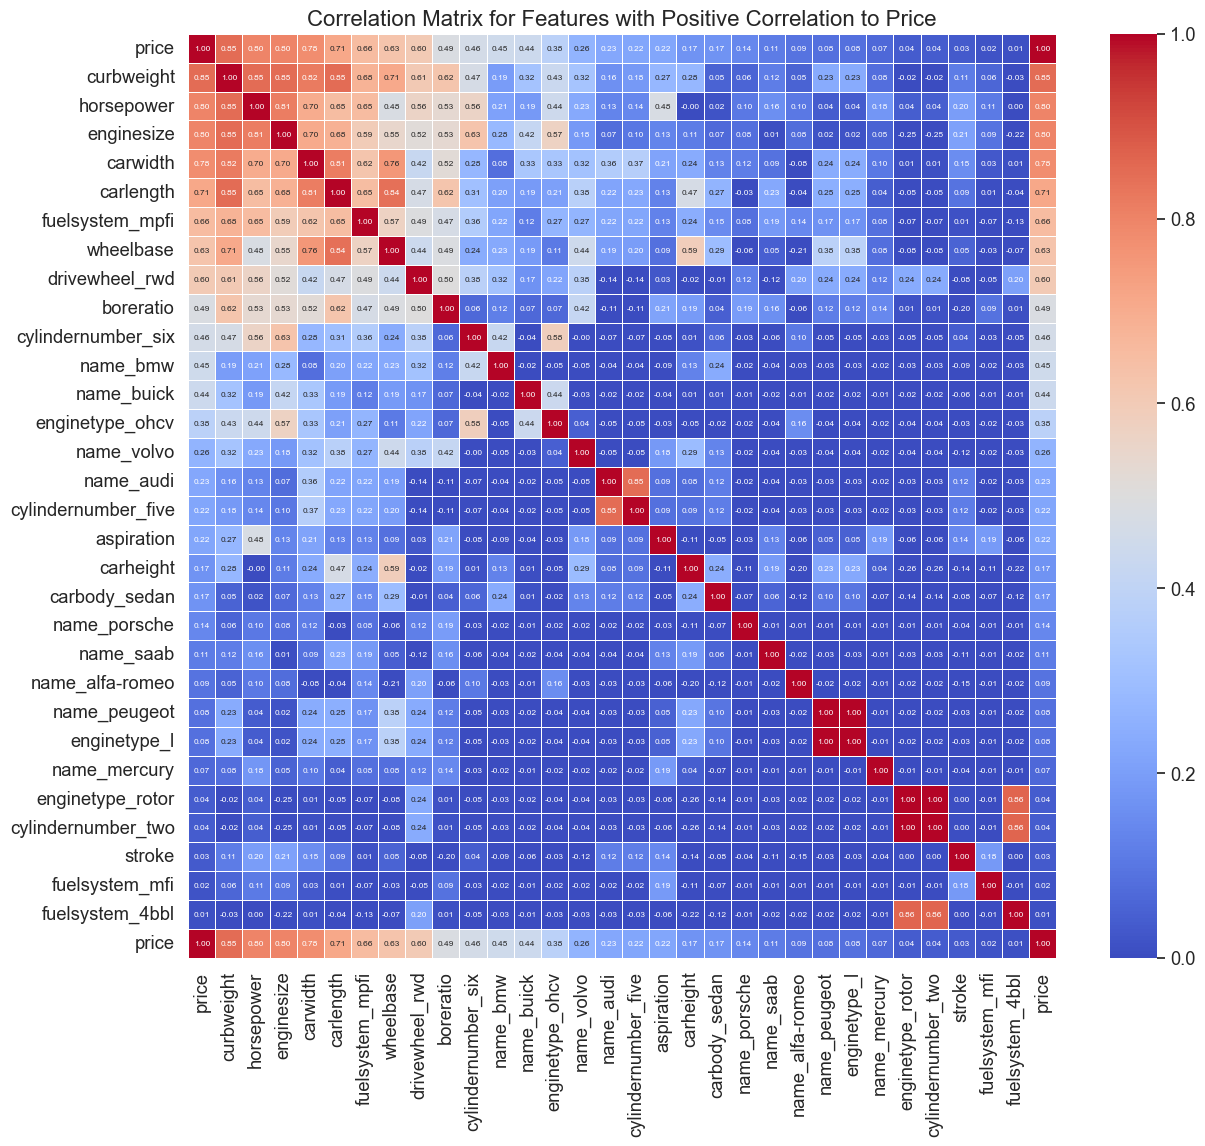

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the correlation table for positive correlation values
positive_correlations = correlation_table[correlation_table["Correlation with Price"] > 0]

# Extract the feature names with positive correlation
positive_features = positive_correlations.index.tolist()

# Create a subset of the dataframe with only positive correlation features and price
positive_correlation_matrix = df[positive_features + ["price"]].corr()

# Adjust the font scale and create the heatmap
sns.set(font_scale=1.2)  # Adjust font scale for better readability
plt.figure(figsize=(14, 12))  # Adjust the figure size for larger boxes
sns.heatmap(
    positive_correlation_matrix,
    annot=True,
    fmt=".2f",  # Format the annotations to 2 decimal places
    annot_kws={"size": 6},  # Adjust the size of annotation text
    cmap="coolwarm",
    linewidths=0.5,
    vmin=0,  # Minimum correlation value (only positive correlations are shown)
)
plt.title("Correlation Matrix for Features with Positive Correlation to Price", fontsize=16)
plt.show()


**Feature Selection and Correlation Analysis**
To identify the key features that strongly influence car prices, we analyze their correlation with the target variable (price). Correlation values help determine the strength of relationships between independent variables and the price of a car.

Correlation Strength Thresholds
We classify correlation strength using the following thresholds:

Strong Correlation: Absolute correlation value ≥ 0.7
Moderate Correlation: Absolute correlation value between 0.5 and 0.7
Weak Correlation: Absolute correlation value < 0.5

**Features with Strong Correlation (≥ 0.7) with Price**
Feature	      Correlation with Price
Engine Size 	0.8304
Curb Weight	    0.8024
Horsepower	    0.7920
Car Width	    0.7118

These features exhibit a high correlation with car prices, making them significant predictors in the pricing model.

**Hyperparameter Tuning:**

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

param_grid_dt = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']
}

# Linear Regression has no hyperparameters to tune in this case
param_grid_lr = {}

# Initialize models
models = {
    "Random Forest": (RandomForestRegressor(random_state=42), param_grid_rf),
    "Gradient Boosting": (GradientBoostingRegressor(random_state=42), param_grid_gb),
    "Decision Tree": (DecisionTreeRegressor(random_state=42), param_grid_dt),
    "Support Vector Regressor": (SVR(), param_grid_svr),
    "Linear Regression": (LinearRegression(), param_grid_lr)
}

# Perform GridSearchCV and evaluate performance
best_estimators = {}
for model_name, (model, param_grid) in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    
    if param_grid:  # Skip GridSearchCV for models with no hyperparameters to tune
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    else:
        model.fit(X_train, y_train)  # Train model directly for Linear Regression
        best_model = model
    
    # Store the best estimator
    best_estimators[model_name] = best_model
    
    # Evaluate performance on the test set
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model_name} Performance after Hyperparameter Tuning:")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print("-" * 50)

Performing GridSearchCV for Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Performance after Hyperparameter Tuning:
R-squared: 0.7919
Mean Squared Error: 13339980.7280
Mean Absolute Error: 1898.4140
--------------------------------------------------
Performing GridSearchCV for Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Gradient Boosting Performance after Hyperparameter Tuning:
R-squared: 0.8286
Mean Squared Error: 10986448.0344
Mean Absolute Error: 1809.2219
--------------------------------------------------
Performing GridSearchCV for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree Performance after Hyperparameter Tuning:
R-squared: 0.8276
Mean Squared Error: 11049439.1190
Mean Absolute Error: 1969.0110
--

**Model Performance Analysis:** Before and After Hyperparameter Tuning
This section evaluates the performance of five regression models before and after hyperparameter tuning. The models analyzed include:

1️⃣ Gradient Boosting Regressor
2️⃣ Random Forest Regressor
3️⃣ Decision Tree Regressor
4️⃣ Support Vector Regressor (SVR)
5️⃣ Linear Regression

The performance metrics considered are:

R-squared (R²): Measures how well the model explains variance in the target variable. Higher is better.
Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values. Lower is better.
Mean Absolute Error (MAE): Measures the average absolute difference between actual and predicted values. Lower is better.

**1. Gradient Boosting Regressor**
Before Tuning: R-squared: 0.9303 MSE: 3.489361 * 10e6 MAE: 1334.1320

After Tuning: R-squared: 0.9094 (↓) MSE: 4.538433 * 10e6 (↑) MAE: 1451.8173 (↑)

🔹 Observation: Performance decreased after tuning, as R² dropped while MSE and MAE increased. This suggests that tuning did not improve the model and may have led to overfitting or suboptimal parameter selection.

**2. Random Forest Regressor**
Before Tuning: R-squared: 0.9303 MSE: 3.493467 * 10e6 MAE: 1286.0717

After Tuning: R-squared: 0.9282 (↓) MSE: 3.595887 * 10e6 (↑) MAE: 1295.1399 (↑)

🔹 Observation: Performance slightly decreased after tuning. The changes in R², MSE, and MAE are minor, but they indicate that tuning did not lead to noticeable improvements.

**3. Decision Tree Regressor**
Before Tuning: R-squared: 0.8622 MSE: 6.901323 * 10e6 MAE: 1709.3063

After Tuning: R-squared: 0.8518 (↓) MSE: 7.426333 * 10e6 (↑) MAE: 1689.4226 (↓)

🔹 Observation: Performance slightly decreased after tuning. R² dropped slightly, and MSE increased. However, MAE improved marginally, suggesting that tuning may have led to better absolute error handling but worse overall variance explanation.

**4. Support Vector Regressor**
Before Tuning: R-squared: -0.0554 MSE: 5.286873 * 10e7 MAE: 4870.1076

After Tuning: R-squared: 0.6652 (↑) MSE: 1.677206 * 10e7 (↓) MAE: 2135.2316 (↓)

Observation: Performance significantly improved after tuning. R-squared turned positive and increased substantially, while MSE and MAE both decreased significantly, making the model much better than before.

**5. Linear Regression**
Before Tuning: R-squared: -0.5966 MSE: 7.997988 * 10e7 MAE: 4303.4873

After Tuning: R-squared: -0.5966 (no change) MSE: 7.997988 * 10e7 (no change) MAE: 4303.4873 (no change)

🔹 Observation: No change in performance, indicating that hyperparameter tuning was likely not applied (or had no effect) due to the lack of tunable parameters in basic Linear Regression.

## Conclusion ##

📌 Best Improvement: Support Vector Regressor showed the most significant improvement after tuning, with a large increase in R² and significant reductions in MSE and MAE.

📌 Best Overall Models: Despite minor declines post-tuning, Gradient Boosting and Random Forest remain the best performing models overall.

📌 Tuning Limitations: Gradient Boosting and Random Forest did not benefit from tuning, possibly due to overfitting or suboptimal hyperparameter selection. Further optimization is required.

📌 Linear Regression: Remained unchanged, reaffirming its limitations in capturing complex relationships.
